## Final Project Submission


### Imports

To start with we need some imports, the import packages will be NLTK (for NLP work), and sklearn (for the modeling), as well as reading in the data

# 1. Overview 

Every two years a new congress is elected, during that time any represenative can present a bill.  Few bills become laws.  From the congress in question (the 116th), only 46 bills became law of the nearly 5,600 that were proposed.  The purpose of this model is to attempt to predict the fate of a bill using its text as a  primary predictor as well as the number of other details as secondary predictors.  The purpose is to give anyone interested in anticpating a likely outcome of a bill to predict it with a reasonable degree of accuracy.  This could be a representative, a lobbyist, or any of the thousands of adminstrators involved in the law making process.  



# 2. Business Problem

Most bills dont become laws.    Since 1973, 342,545 bills have been proposed of those, 3% became laws and only 4% saw a vote.  Most bills die in committe.  Meaning they never make it to the floor for consideration after being submitted by a representative.  Writing and submitting a proposal is a lengthy process taking much time and effort, and bills can take years to be ammended.  Knowing if a proposal is likely to pass influences the entire nation anyone in that nation who this would effected by a bill or who would be interested in influencing the fate.   A tool capible of predicting the outcome of a bill in advance would be invaluable to anyone affected by the bill or who would be interested in influencing a bills outcome.

Consider beyond the Washington context, a bill if passed becomes a law in 10 days.  If a bussiness would be effected by a law that is likely to pass, getting head of the curve before that law passes would be a competitve advantage for a company.  Consider a hypthoetical bill, that would make use of a certian chemcial illegal, if a company could anticipate the passing of this law, it could adapt and be prepared before the law passes and be ahead of the competition.

The utlimate goal of this project is to create such system.  One that can predict the outcome of a bill passing given it’s topic, wording, and a  number other features.  

IMPORTANT HERE QUANTIFY THE COSTS OF PASSING A LAW MONEY TIME AND HOW THIS COULD REDUCE THEM

Sources:

https://www.govtrack.us/congress/bills/statistics

https://www.congress.gov/help/learn-about-the-legislative-process/how-our-laws-are-made



# 3. Data Understanding


The data consists of information scrapped from the office of the clerk’s website.  clerk.house.gov and submitted as a kaggle competition.  The focus of this analysis will be two CSV files.  One consisting of each bill (its committee assignments, cosponsors, and other details) and the second is a list of the elected representatives of the congress.

In keeping with the reality of dirty data.  The data set had only 5,600 proposals of which only 2400 had summaries included.   

Of those 2400 proposals only 1922 were bills and of those only 31 became laws.   

It was assumed this was complete data.  This is not the case.   Upon further investigation the actual data source appears to have 20,000 proposals for this session of congress, thus, the data sets used were incomplete.

Attempts to complete the dataset was proving difficult, the model and pipeline had been built on the incomplete data which would have a different format, and take time to replicate the scrapping format used in the kaggle dataset.  For the sake of time, it was decided to make a working prototype using the existing data and then complete the data at a later point.  The list of 2000 bills is enough to start training a model on.  However, it should be noted that 344 bills became laws during this session meaning our sample may be considered inaccurate of the “population” of bills.  Our data is roughly 10% if all the proposals of the 116th congress.  
It needs to be noted that this data did not include any bills that originated in the senate only house proposals.  

Within those there are two types of proposals, bills, and resolutions.  A bill, is a proposal to become a law.  A resolution is a statement of congressional sentiment.  Something that if agreed to by a majority, is noted as representing a majority opinion of the congress.  These latter proposals are useful political tools, and there are 3 types of resolutions.  However, each is either agreed to by the congress or remains as “introduced”.  Two are joint resolutions between both chambers, and the 3rd is a house specific resolution.  

There are numerous details within each proposal to consider.  What kind of proposal is it? Who sponsored it? Who cosponsored it, how many representatives cosponsored it? What where their party affiliations?  What committees was the bill they assigned to, what was the bill's topic? how many subcommittees were assigned the bill, was the bill introduced in the house or the senate first.   What state is the representative from?  What constituency concerns might they have to consider?  Who was the head of the committees the assigned to, what was their party affiliation?  Etc. etc.  All of this could serve as insightful and each would need to be created manually using the data.  

For the Sake of this project the following will be the categories used

- Proposal Summary Text
- Assigned Committee
- Bill Subject
- Policy Area
- Number of Cosponsors
- Ratio of Cosponsors

1. Most Proposals have a summary, a body of text about 60 to 90 words with some being as long as 6000 and others as short as 4.  This text is a summary of the bill.
2. Assigned Committees, each bill once introduced to the house is assigned to a committee by the speaker of the house, these committees are chaired by members of congress who can debate, amend, and deliberate on a bill while hearing from topic experts and the public on the issue.  Most bills die in committee, meaning taking which committee a bill is assigned could be predictive.  Bills can be assigned to numerous committees by its primary committee as well, to gain addition insight into the topic or even to slow the bill down in hopes of killing it.  This can be a political move to prevent pork barreling or a legitimate action to gain more insight, say a bill will influence both the enviroment and energy sectors.  However, knowing which committees a bill is assigned to can still be insightful especially if a bill only ever stays with one committee or is given to many.  
3. Bill Subject: Each bill can have numerous subjects asscoiated with them which can help with the placement, in this case it can help as well in identifying if proposals on certain subjects are more or less likely to pass
4. Policy Area: Similar to but uniquely different than subject is the policy area, another category each bill may have
5. A bill may be cosponsored by any number of other representatives the thinking is, that more cosponsors may indicate greater support and thus a higher likelihood of passing.  However, in practice this may also suggest that a number of representatives merely want to be associated with a bill they know won't pass, or are seeking to help pass a bill they know will have trouble passing, a high number of cosponsors may not indicate a higher likelihood of passing automatically unless taking into account with other factors.
6. Cosponsor Ratio: In light of the previous point, it was thought that the partisan ratio of cosponsors may be insightful as to the likelihood of a proposal passing, to this end a feature was created to explore this possibility, each proposal was given a ratio of the partisan affiliation of cosponsors for both parties.  EG. 56 Cosponsors from Party A, to 0 from Party B indicating a party proposal rather than a joint one.

##### Limitations

As mentioned, the data is incomplete, in that it only contains roughly a tenth of proposals before congress.  

One other vital limitation to note, this data is only proposals in the house.  Meaning it has no ability to predict or anticpate the dynamics of the Senate.  Which is half of the legislative body.

Additional levels of nuance exist.  But are beyond the current scope of the model’s ability to detect.  For example, the degree to which a representatives works to get cosponsorship or votes for a proposal is not directly related to the topic itself. The reputation of the bill sponsor or consponsor, matters as much as the bill itself.  A representative with a poor reputation, one who is doesn’t work with others, backs stabs, is belligerently inflexible what have you, may have more or less success in passing legislation.   Enemies will vote together if they think there is something in it for them, or an issue of sufficient importance at stake.  The complexity of congressional relationships, representative platforms, constituency concerns and various private concerns are all lost on this model.  

Creating a unique profile on even one representative and on their relationship with other representatives would an entire project in itself, let alone for each of the 500 representatives of the house.

This aspect will limit the model’s predictive ability on unseen data.  What a representative may feel compelled to support does not always align with their party, their personal platform or their constituency concerns, many others factors influence a representative. That are not noted directly or even indirectly here.  This said, such a data source capable of such naunce does not exisit and the ethics of such a 



### 3.1 Data Understanding - Importing Packages

In [3]:
#Imports  Consisitng mostly of SKLEAN and NLKT, SKlearn is a series of modeling packages and NTKL is NLP specific packages

import pandas as pd
from collections import defaultdict
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree

#disabling _some_ warnings for a cleaning notebook
import warnings
warnings.filterwarnings('ignore')

#predefining stopwords
sw = stopwords.words('english') + list(string.punctuation)




### 3.2 Data Understanding - Importing The Data 

In [4]:
import pandas as pd #standard data package
bills=pd.read_csv('Data/house_legislation_116.csv')  # contains the bill information itself.
cleaned_CL=pd.read_csv('Data/Committee_Assignments_Cleaned.csv') # a table of party assignments by committee using a custom function
house=pd.read_csv('Data/house_members_116.csv')  # Contains committee assingments and party affiliation for every representative in the congress


Lets take a quick look at each of these

bills : This is the big one, this has the proposal summary in it as well as the assigned committes, progess (being our target) and many other things.  This is our primary data set.  It has everything about the bills themselves

In [5]:
bills

,bill_id,title,sponsor,cosponsors,related_bills,policy_area,subjects,committees,bill_progress,summary,date_introduced,number,bill_type
0,H.R.1,"To expand Americans' access to the ballot box,...",S001168,"['P000197', 'A000370', 'A000376', 'B001300', '...","['H.R.44', 'H.R.93', 'H.R.137', 'H.R.138', 'H....",Government Operations and Politics,['Administrative law and regulatory procedures...,"['House Administration', 'House Intelligence (...",Passed House,"This bill addresses voter access, election int...",2019-01-03,1,H.R.
1,H.R.3,"To establish a fair price negotiation program,...",P000034,"['N000015', 'S000185', 'L000557', 'K000382', '...","['H.R.4619', 'H.R.4649', 'H8607', 'H.R.4663']",Health,[],"['House Energy and Commerce', 'House Ways and ...",Introduced,This bill establishes several programs and req...,2019-09-19,3,H.R.
2,H.R.4,To amend the Voting Rights Act of 1965 to revi...,S001185,"['L000287', 'P000197', 'H000874', 'C000537', '...","['H.R.1799', 'S.561']",Government Operations and Politics,"['Civil actions and liability', 'Elections, vo...",['House Judiciary'],Introduced,NaN,2019-02-26,4,H.R.
3,H.R.5,To prohibit discrimination on the basis of sex...,C001084,"['F000466', 'C001119', 'D000629', 'H001087', '...","['H.Res.377', 'S.788']","Civil Rights and Liberties, Minority Issues","['Civil actions and liability', 'Consumer cred...","['House Judiciary', 'House Education and Labor...",Passed House,This bill prohibits discrimination based on se...,2019-03-13,5,H.R.
4,H.R.6,To authorize the cancellation of removal and a...,R000486,"['V000081', 'C001067', 'A000371', 'B001300', '...","['H.R.2820', 'H.R.2821', 'H.Res.415', 'S.874']",Immigration,['Administrative law and regulatory procedures...,"['House Judiciary', 'House Education and Labor']",Passed House,This bill cancels and prohibits removal procee...,2019-03-12,6,H.R.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5801,H.Con.Res.67,Recognizing the International Day of Peace.,L000287,"['M000312', 'G000551', 'J000032', 'S000510', '...",[],International Affairs,"['Commemorative events and holidays', 'Conflic...",['House Oversight and Reform'],Introduced,NaN,2019-09-26,67,H.Con.Res.
5802,H.Con.Res.68,Providing for a joint hearing of the Committee...,R000602,"['A000369', 'B001282', 'B001287', 'B001301', '...",[],Economics and Public Finance,[],['House Rules'],Introduced,This concurrent resolution requires the congre...,2019-09-26,68,H.Con.Res.
5803,H.Con.Res.69,Congratulating the Portland Trail Blazers on t...,B000574,"['B001278', 'W000791', 'D000191', 'S001180']",['S.Con.Res.28'],Sports and Recreation,"['Athletes', 'Commemorative events and holiday...",['House Oversight and Reform'],Introduced,NaN,2019-10-23,69,H.Con.Res.
5804,H.Con.Res.70,Directing the President pursuant to section 5(...,G000571,[],[],International Affairs,"['Conflicts and wars', 'Middle East', 'Militar...",['House Foreign Affairs'],Introduced,NaN,2019-10-31,70,H.Con.Res.


This ia table for later, that is just being important here for neatness sake, this is just manual break down of the committees by their partiasin affiliation

In [6]:
cleaned_CL

,Unnamed: 0,Committees,Republican,Democrate
0,0,Agriculture,21,26
1,1,Appropriations,23,30
2,2,Armed Services,26,31
3,3,Budget,13,22
4,4,Education and Labor,22,28
5,5,Energy and Commerce,24,31
6,6,Ethics,5,5
7,7,Financial Services,26,34
8,8,Foreign Affairs,21,26
9,9,Intelligence,9,13


This is a data set of all the information about the representatives themselves.  What state they are from, what party their are affliated wtih, what committees they are assigned to etc

In [7]:
house

,name_id,name,state,url,chamber,current_party,committee_assignments
0,A000374,ralph-abraham,Louisiana,https://www.congress.gov/member/ralph-abraham/...,House,Republican,"['Agriculture', 'Armed Services']"
1,A000370,alma-adams,North Carolina,https://www.congress.gov/member/alma-adams/A00...,House,Democratic,"['Agriculture', 'Education and Labor', 'Financ..."
2,A000055,robert-aderholt,Alabama,https://www.congress.gov/member/robert-aderhol...,House,Republican,['Appropriations']
3,A000371,pete-aguilar,California,https://www.congress.gov/member/pete-aguilar/A...,House,Democratic,"['Appropriations', 'House Administration']"
4,A000372,rick-allen,Georgia,https://www.congress.gov/member/rick-allen/A00...,House,Republican,"['Agriculture', 'Education and Labor']"
...,...,...,...,...,...,...,...
438,W000827,ron-wright,Texas,https://www.congress.gov/member/ron-wright/W00...,House,Republican,"['Education and Labor', 'Foreign Affairs']"
439,Y000062,john-yarmuth,Kentucky,https://www.congress.gov/member/john-yarmuth/Y...,House,Democratic,"['Budget, Chair']"
440,Y000065,ted-yoho,Florida,https://www.congress.gov/member/ted-yoho/Y000065,House,Republican,"['Agriculture', 'Foreign Affairs']"
441,Y000033,don-young,Alaska,https://www.congress.gov/member/don-young/Y000033,House,Republican,"['Natural Resources', 'Transportation and Infr..."


### 3.3 Data Understanding - Exploration

In [8]:
#  How Large is the Data?

len(bills)

5806

Okay Looks like about 6000 proposals

What are the possible outcomes for the proposals, this will be our target for predicting.  In essence our model will be learning how to predict these things

In [9]:
bills['bill_progress'].value_counts()

Introduced                  5314
Passed House                 305
Agreed to in House           124
Became Law                    46
Agreed to in Senate            8
Passed Senate                  5
Failed House                   2
Failed to pass over veto       1
To President                   1
Name: bill_progress, dtype: int64

Okay, How clean is our data? How much data is missing?

In [10]:
bills.isna().sum()

bill_id               0
title                 0
sponsor               0
cosponsors            0
related_bills         0
policy_area         236
subjects              0
committees            0
bill_progress         0
summary            3380
date_introduced      24
number                0
bill_type             0
dtype: int64

Oh dear, our main intended predictor is missing in over half the bills..... and there's no ready way for us to fill that in quickly....
The easy way would be to scrape the data myself.  There seems to be a total of 20,000 proposals in this session of congress.  The simiplest solution would be to remove NAs as this data is already incomplete to replace the missing data would be as goo as to rescrape it all entirely from scratch which the time is not available to do.

Because this data set has unique information that would take much effort to replicate we're just going to push ahead with the remaining 2400 proposals.  The beautiful thing is, once the architetcutre is in place complete data could be fed in.  This is a big decision but it was decided in order to met the project dead line this had to be until better data could be scrapped.  In future this will not take much effort

In [11]:
butchered=bills.dropna()

Some of the data looked like lists

In [12]:
bills['cosponsors'][0]

"['P000197', 'A000370', 'A000376', 'B001300', 'B001281', 'B001292', 'B000490', 'B000574', 'B001278', 'B001296', 'B001304', 'B001285', 'B001286', 'B001251', 'C001112', 'C001097', 'C001090', 'C001055', 'C001117', 'C001066', 'C001080', 'C001084', 'C001123', 'C001101', 'C001067', 'C001049', 'C000537', 'C001068', 'C001078', 'C000754', 'C001110', 'C001069', 'C001124', 'C001119', 'C001111', 'C001121', 'C000984', 'D000629', 'D000096', 'D000598', 'D000631', 'D000191', 'D000197', 'D000216', 'D000617', 'D000630', 'D000627', 'D000623', 'D000610', 'D000624', 'D000482', 'E000179', 'E000299', 'E000215', 'E000297', 'E000296', 'F000468', 'F000462', 'G000571', 'G000574', 'G000559', 'G000587', 'G000586', 'G000592', 'G000585', 'G000553', 'G000551', 'H001080', 'H001090', 'H000324', 'H001081', 'H001064', 'H001038', 'H001087', 'H001047', 'H001066', 'H001085', 'H000874', 'H001068', 'J000032', 'J000298', 'J000294', 'J000288', 'K000009', 'K000375', 'K000385', 'K000379', 'K000389', 'K000380', 'K000381', 'K000394

But upon inspection there are strings that _look_ like lists, likely the original scrapping saved this as python lists and then they were converted into pure strings somewhere along the way.  

In [13]:
print(type(bills['cosponsors'][0]))
print(bills['cosponsors'][0][2])

<class 'str'>
P


### 3.4 Data Understanding - Data Cleaning and Feature Engineering

In order to address the problem just mentioned we need to define a quick function to turn this strings that look like lists back into lists.

In [14]:


def cleaning(word):
    output=word.replace('[','')
    output=output.replace(']','')
    output=output.replace('"','')
    output=output.replace("'",'')
    output=output.split(', ')
    return output
    
# removes punctuation and returns a list by splitting on " , " 

In [15]:
# Sanity Check
#applying the cleaning function to every row in the specified column and checking
butchered['cosponsors']=butchered['cosponsors'].apply(cleaning)
print(type(butchered['cosponsors'][0]))
butchered['cosponsors'][0][2]

<class 'list'>


'A000376'

Huzzah! Lets Go Head and apply that function to the other objects that should be lists in our data.  It stands to reason is this list was a string the others will be too, so let's apply thins function to them all.

In [16]:
# Cleaning Data
butchered['related_bills']=butchered['related_bills'].apply(cleaning)
butchered['committees']=butchered['committees'].apply(cleaning)
butchered['subjects']=butchered['subjects'].apply(cleaning)
butchered['policy_area']=butchered['policy_area'].apply(cleaning)

Alright let's go ahead and start creating some features with that information


In [17]:
#Creating a list of the number of cosponsors on a bill
butchered['CoSponsor_Count']=[len(set(x)) for x in butchered['cosponsors']]

In [18]:
# Creating Lists of representatives by their party affilation
repub=[]
repub=house[house['current_party']=='Republican']
repub['name_id'].unique()

repub=repub['name_id'].values.tolist()

# Creating a second of representatives by their party affilation

demo=house[house['current_party']=='Democratic']
demo['name_id']

demo=demo['name_id'].values.tolist()

# Defining two functions so that they can be "Mapped" to the dataframe  Each Function will check how many of the cosponsors are in each list and then save that number off as a ratio.

def dcounting(cospons):
    # at the begin of each use of the function reset all variables to 0 to prevent roll over
    r=0
    d=0
    ratio=0
    for x in cospons:
        if (x in repub):
            #For each Republican Cosponsor found add one to the republican count
            r=r+1
        elif (x in demo):
            #for each Democrate Cosponsor found add one to the democrate count
            d=d+1
    if r==0 and d>0:
        ratio=1
        #if there are only democrat sponsors the ratio of D to R will automatically be 1, in the past this created issues and so this clause was added to prempt any divde by zero errors. 
    elif d==0 and r==0:
        ratio=0
        # If there no cosponsors for the bill set the ratio to 0,  if both R ratio and D ratio are 0 the model can pick up on that while training
    else:
        ratio=((d)/(d+r))   
        #if there are both republican and democrate sponsors for a bill then take a ratio of those by the number of republicans to the number of democrates
        
    #return the Ratio of Democrates to Repbulicans
    return ratio



#Creating a New Column Using the previous information
butchered['D_cosponsor_ratio']=butchered['cosponsors'].map(dcounting)

def rcounting(cospons):
    r=0
    d=0
    ratio=0
    for x in cospons:
        if (x in repub):
            r=r+1
            
        elif (x in demo):
            d=d+1
    
    if d==0 and r>0:
        ratio=1
    elif d==0 and r==0:
        ratio=0
    else:
        ratio=((r)/(d+r))
    
    return ratio


butchered['R_cosponsor_ratio']=butchered['cosponsors'].map(rcounting)

Preforming a Quick Sanity Check

In [19]:
butchered

,bill_id,title,sponsor,cosponsors,related_bills,policy_area,subjects,committees,bill_progress,summary,date_introduced,number,bill_type,CoSponsor_Count,D_cosponsor_ratio,R_cosponsor_ratio
0,H.R.1,"To expand Americans' access to the ballot box,...",S001168,"[P000197, A000370, A000376, B001300, B001281, ...","[H.R.44, H.R.93, H.R.137, H.R.138, H.R.196, H....",[Government Operations and Politics],"[Administrative law and regulatory procedures,...","[House Administration, House Intelligence (Per...",Passed House,"This bill addresses voter access, election int...",2019-01-03,1,H.R.,236,1.000000,0.000000
1,H.R.3,"To establish a fair price negotiation program,...",P000034,"[N000015, S000185, L000557, K000382, D000197, ...","[H.R.4619, H.R.4649, H8607, H.R.4663]",[Health],[],"[House Energy and Commerce, House Ways and Mea...",Introduced,This bill establishes several programs and req...,2019-09-19,3,H.R.,85,1.000000,0.000000
3,H.R.5,To prohibit discrimination on the basis of sex...,C001084,"[F000466, C001119, D000629, H001087, M001185, ...","[H.Res.377, S.788]","[Civil Rights and Liberties, Minority Issues]","[Civil actions and liability, Consumer credit,...","[House Judiciary, House Education and Labor, H...",Passed House,This bill prohibits discrimination based on se...,2019-03-13,5,H.R.,240,0.987500,0.012500
4,H.R.6,To authorize the cancellation of removal and a...,R000486,"[V000081, C001067, A000371, B001300, C001112, ...","[H.R.2820, H.R.2821, H.Res.415, S.874]",[Immigration],"[Administrative law and regulatory procedures,...","[House Judiciary, House Education and Labor]",Passed House,This bill cancels and prohibits removal procee...,2019-03-12,6,H.R.,232,1.000000,0.000000
5,H.R.7,To amend the Fair Labor Standards Act of 1938 ...,D000216,"[P000197, H000874, C000537, S000185, D000627, ...","[H.Res.252, S.270]",[Labor and Employment],"[Administrative law and regulatory procedures,...",[House Education and Labor],Passed House,This bill addresses wage discrimination on the...,2019-01-30,7,H.R.,239,0.995816,0.004184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5791,H.Con.Res.57,Authorizing the use of Emancipation Hall for a...,B001270,[],[H.Con.Res.53],[Congress],"[Commemorative events and holidays, Racial and...",[House Administration],Agreed to in Senate,This concurrent resolution authorizes the use ...,2019-08-09,57,H.Con.Res.,1,0.000000,0.000000
5793,H.Con.Res.59,Recognizing the significance of equal pay and ...,A000370,"[L000581, F000462, S001175, E000299, H001080, ...",[H.Con.Res.30],[Labor and Employment],[Employment discrimination and employee rights...,[House Education and Labor],Introduced,This concurrent resolution recognizes the disp...,2019-08-23,59,H.Con.Res.,71,1.000000,0.000000
5798,H.Con.Res.64,Recognizing the 25th anniversary of AmeriCorps.,M001163,"[P000523, N000147, M000087, S001185, S001145, ...","[S.Res.326, S5669-5670, S5666]",[Labor and Employment],[],[House Education and Labor],Introduced,This concurrent resolution recognizes the sign...,2019-09-18,64,H.Con.Res.,13,0.923077,0.076923
5799,H.Con.Res.65,Supporting the clean vehicle emissions standar...,D000623,"[L000579, H001068, B001300, L000551, B000574, ...",[S.Res.316],[Environmental Protection],"[Administrative law and regulatory procedures,...",[House Energy and Commerce],Introduced,This concurrent resolution supports existing r...,2019-09-19,65,H.Con.Res.,91,1.000000,0.000000


For these Categorical Variables we can ONE Hot Encode them later..

Lets ONE HOT encode everything we're interested in now, and then just drop the orignals before feeding them back into the model

In [20]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
#Because we have a list of lists.  A normal one hot encoder wont be able to work


#Attempted Function. But it Crashed the Kernal in this case.
test=butchered['committees']
res=pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
butchered = pd.merge(butchered, res, left_index=True, right_index=True)

test=butchered['subjects']

res=pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
butchered = pd.merge(butchered, res, left_index=True, right_index=True)

test=butchered['policy_area']

res=pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
butchered = pd.merge(butchered, res, left_index=True, right_index=True)


butchered

## Problems.. the and Pen... remove ands nope some ands are neccesasry.. oh dear...  There is some dirt in this..... well.  Its uniform Dirt....

,bill_id,title,sponsor,cosponsors,related_bills,policy_area,subjects,committees,bill_progress,summary,...,Public Lands and Natural Resources,Religion_y,Science_y,Social Sciences and History,Social Welfare,Sports and Recreation,Taxation,Technology,Transportation and Public Works,Water Resources Development
0,H.R.1,"To expand Americans' access to the ballot box,...",S001168,"[P000197, A000370, A000376, B001300, B001281, ...","[H.R.44, H.R.93, H.R.137, H.R.138, H.R.196, H....",[Government Operations and Politics],"[Administrative law and regulatory procedures,...","[House Administration, House Intelligence (Per...",Passed House,"This bill addresses voter access, election int...",...,0,0,0,0,0,0,0,0,0,0
1,H.R.3,"To establish a fair price negotiation program,...",P000034,"[N000015, S000185, L000557, K000382, D000197, ...","[H.R.4619, H.R.4649, H8607, H.R.4663]",[Health],[],"[House Energy and Commerce, House Ways and Mea...",Introduced,This bill establishes several programs and req...,...,0,0,0,0,0,0,0,0,0,0
3,H.R.5,To prohibit discrimination on the basis of sex...,C001084,"[F000466, C001119, D000629, H001087, M001185, ...","[H.Res.377, S.788]","[Civil Rights and Liberties, Minority Issues]","[Civil actions and liability, Consumer credit,...","[House Judiciary, House Education and Labor, H...",Passed House,This bill prohibits discrimination based on se...,...,0,0,0,0,0,0,0,0,0,0
4,H.R.6,To authorize the cancellation of removal and a...,R000486,"[V000081, C001067, A000371, B001300, C001112, ...","[H.R.2820, H.R.2821, H.Res.415, S.874]",[Immigration],"[Administrative law and regulatory procedures,...","[House Judiciary, House Education and Labor]",Passed House,This bill cancels and prohibits removal procee...,...,0,0,0,0,0,0,0,0,0,0
5,H.R.7,To amend the Fair Labor Standards Act of 1938 ...,D000216,"[P000197, H000874, C000537, S000185, D000627, ...","[H.Res.252, S.270]",[Labor and Employment],"[Administrative law and regulatory procedures,...",[House Education and Labor],Passed House,This bill addresses wage discrimination on the...,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5791,H.Con.Res.57,Authorizing the use of Emancipation Hall for a...,B001270,[],[H.Con.Res.53],[Congress],"[Commemorative events and holidays, Racial and...",[House Administration],Agreed to in Senate,This concurrent resolution authorizes the use ...,...,0,0,0,0,0,0,0,0,0,0
5793,H.Con.Res.59,Recognizing the significance of equal pay and ...,A000370,"[L000581, F000462, S001175, E000299, H001080, ...",[H.Con.Res.30],[Labor and Employment],[Employment discrimination and employee rights...,[House Education and Labor],Introduced,This concurrent resolution recognizes the disp...,...,0,0,0,0,0,0,0,0,0,0
5798,H.Con.Res.64,Recognizing the 25th anniversary of AmeriCorps.,M001163,"[P000523, N000147, M000087, S001185, S001145, ...","[S.Res.326, S5669-5670, S5666]",[Labor and Employment],[],[House Education and Labor],Introduced,This concurrent resolution recognizes the sign...,...,0,0,0,0,0,0,0,0,0,0
5799,H.Con.Res.65,Supporting the clean vehicle emissions standar...,D000623,"[L000579, H001068, B001300, L000551, B000574, ...",[S.Res.316],[Environmental Protection],"[Administrative law and regulatory procedures,...",[House Energy and Commerce],Introduced,This concurrent resolution supports existing r...,...,0,0,0,0,0,0,0,0,0,0


In [21]:
def get_wordnet_pos(treebank_tag):
    '''
    Translate nltk POS to wordnet tags
    '''
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
# Returns wors with sparts of speach

### 3.5 Data Understanding: Word Preparation Function

Now that we've engineered some features lets turn our attention to the meat of the project, the bill text itself.  It needs to be transformed into a formate that the model can understand.  Modeling is character specific so things like captialization punctuation, and word tense all matter here.

Lucky we can just write a function that will do all of that for us.  These are things like removing punctuation, to removing stop words, to lemmatizing.

One Last Thing.  Applying the Preprocessing Function to the Proposal Summaries

In [22]:
extrasw=['shall' ,'state', 'states', 'such', 'that', 'the' 'the bill', 'the department' 'the united', 'the united states', 'this', 'this bill', 'this resolution', 'to', 'to the', 'under', 'united', 'united states', 'which', 'who', 'with','is', 'it', 'may', 'in', 'if', 'from', 'by', 'by the', 'be', 'at', 'as', 'are', 'and the', 'the', 'an', 'also', 'of', 'of the', 'on', 'on the', 'or', 'other', 'to', 'to the', 'which', 'with', 'united']
for x in extrasw:
    sw.append(x)


In [23]:

lemmatizer= nltk.stem.WordNetLemmatizer()

def prep(doc):
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    tokenizer = RegexpTokenizer(pattern)
    # Declaring each time could be compputationally inefficent but doesnt seem to be impacting the run time significnatly
    sample_doc = tokenizer.tokenize(doc)
    # for the docuemnt which is just a string.
    sample_doc = [token.lower() for token in sample_doc]
    sample_doc = [token for token in sample_doc if token not in sw]
    #maybe not lemmetizing here?
    sample_doc = [lemmatizer.lemmatize(token) for token in sample_doc]
    sample_doc_tagged = pos_tag(sample_doc)
    sample_doc_tagged = [(pair[0], get_wordnet_pos(pair[1])) for pair in sample_doc_tagged]
    return sample_doc_tagged

### 3.6 Vectorizer

Decision tree models function on numbers.  They compute and calculate and understand the world through numbers.  Meaning raw text is beyond their ability to understand unless its translated into a numeric representation of the text.  To do that we need a vectorizer, something that will represent the text of each document across the entire collection documents in a way that will allow for comparision between documents.

In order to convert text to a number format we need a vectorizer.  The two most common vectorizers are a TF-IDF, and a Count vectorizer, a count looks at how often a word appears in total a TF-IDF looks at how unique to a document a word is.  For example if "liscence plate" is a singifcantly unique term to a document a TF-IDF will take not this more than a simple count vectorizer will.  In this context either method can prove fruitful, and in honesty both could used here depending on desired outcome.  

In [24]:
#instantiating a TF-IDF Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(3,5), min_df=.9, max_features=500,preprocessor=prep)


# 4. Modeling


### 4.1 Modeling - Train Test Split 

In [54]:
#Copying the dataset
dataset=butchered

#saving off a target for predictions

values=["Failed to pass over veto", 'Failed House']
dataset=dataset[dataset.bill_progress.isin(values)==False]

y=dataset.bill_progress
# dropping unneeded columns now for prediction
X=dataset.drop(['bill_id','title','sponsor','cosponsors','related_bills','policy_area','subjects'], axis=1 )
X=X.drop(['committees','date_introduced','number','bill_type','bill_progress'], axis=1)


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)



#instantiating a vectorizer, giving it the ability to make up to qunitograms just in case, and setting how many documents a term has to appear in before it can be used, and how many features the vectorizer is allowed to make
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,5), min_df=.1, max_features=500)

#fitting the vectorizer
data=vectorizer.fit_transform((X_train['summary']))


#transfomring the vectorizer back into a dataframe
datadf=pd.DataFrame.sparse.from_spmatrix(data, columns=sorted(vectorizer.vocabulary_),index=X_train.index)

#joining the vectorized data back to the other one hot encoded data
x_train_final=pd.concat([X_train, datadf], axis=1)


x_train_final=x_train_final.drop('summary',axis=1)



In [55]:
for k in x_train_final.keys():
    print(k)

CoSponsor_Count
D_cosponsor_ratio
R_cosponsor_ratio
_x
Education_x
House Administration
House Agriculture
House Appropriations
House Armed Services
House Budget
House Education and Labor
House Energy and Commerce
House Ethics
House Financial Services
House Foreign Affairs
House Homeland Security
House Intelligence (Permanent Select)
House Judiciary
House Natural Resources
House Oversight and Reform
House Rules
House Science
House Small Business
House Transportation and Infrastructure
House Veterans Affairs
House Ways and Means
Housing
Labor
Science_x
Senate Appropriations
Senate Armed Services
Senate Banking
Senate Budget
Senate Commerce
Senate Energy and Natural Resources
Senate Environment and Public Works
Senate Finance
Senate Foreign Relations
Senate Health
Senate Homeland Security and Governmental Affairs
Senate Indian Affairs
Senate Intelligence
Senate Judiciary
Senate Rules and Administration
Senate Small Business and Entrepreneurship
Senate Veterans Affairs
Space_x
and Pensions

When it comes Modeling it is always important to first have a base line model.  This is used to test the ability of our model on real data.  In this case we will be using a "dummy" model trained to guess the most common class.  In this case that would be "Introduced" or in other words that the proposal died.

### 4.2 Simple Model

In [56]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators =1000,criterion="entropy",random_state =0)
classifier.fit(x_train_final,y_train)
# Predicting the Test set results

#Applying the same preprocessing techniques to the testing data
datatrain=vectorizer.transform((X_test['summary']))

datadf2=pd.DataFrame.sparse.from_spmatrix(datatrain, columns=sorted(vectorizer.vocabulary_),index=X_test.index)

X_test_final=pd.concat([X_test, datadf2], axis=1)


X_test_final=X_test_final.drop('summary',axis=1)

y_pred = classifier.predict(X_test_final)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred)
cm2

array([[ 13,   0,   0,  12,   0,   0],
       [  0,   1,   0,   2,   0,   0],
       [  0,   0,   1,   7,   0,   0],
       [  1,   0,   0, 398,   0,   0],
       [  0,   0,   0,  29,  14,   0],
       [  0,   0,   0,   1,   0,   0]])

In [57]:
y_train

2691      Introduced
3133      Introduced
183       Introduced
2112      Introduced
1538      Introduced
            ...     
1696      Introduced
3710    Passed House
1116      Introduced
1239      Introduced
3402      Introduced
Name: bill_progress, Length: 1914, dtype: object

In [58]:
X_test_final

,CoSponsor_Count,D_cosponsor_ratio,R_cosponsor_ratio,_x,Education_x,House Administration,House Agriculture,House Appropriations,House Armed Services,House Budget,...,this resolution,to,to the,under,united,united states,which,who,with,year
361,1,0.000000,0.000000,0,0,0,0,0,0,0,...,0.000000,0.287015,0.119108,0.135123,0.0,0.0,0.000000,0.148458,0.000000,0.00000
4723,1,1.000000,0.000000,0,0,0,0,0,0,0,...,0.000000,0.101294,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.206203,0.00000
403,9,0.888889,0.111111,0,0,0,0,0,0,0,...,0.000000,0.258212,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000
5446,25,1.000000,0.000000,0,0,0,0,0,0,0,...,0.163567,0.068455,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000
313,11,0.909091,0.090909,0,0,0,0,0,0,0,...,0.000000,0.439512,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.298236,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1,0.000000,1.000000,0,0,0,0,0,0,0,...,0.000000,0.403934,0.000000,0.000000,0.0,0.0,0.257684,0.000000,0.000000,0.00000
2867,1,0.000000,1.000000,0,0,0,0,0,0,0,...,0.000000,0.082237,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000
355,186,0.677419,0.322581,0,0,0,0,1,0,0,...,0.000000,0.068796,0.142748,0.000000,0.0,0.0,0.131663,0.000000,0.000000,0.14162
2826,4,0.750000,0.250000,0,0,0,0,0,0,0,...,0.000000,0.380242,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000


*Talk About DUmmy Model Here*

### 4.3 Naive Bayes

In [59]:
# Naive Bayes

*Discuss Naive Bayes*

### 4.5 Modeling Grid Searching

This is a set of grid search parameters borrowered from

In [60]:
## This was taken from a tutorial online which I can't find now.  The options are a well rounded set of possiblities and the outcome does not seem to be maxing out in anyway 

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [61]:
rf_random = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1, refit=True)
# Fit the random search model
rf_random.fit(x_train_final, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    n_estimators=1000,
                                                    random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [62]:
best=rf_random.best_params_

In [63]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=60,
                       min_samples_split=5, n_estimators=600, random_state=0)

In [64]:
import pickle 

pickle.dump(best, open('RFmodelmk1.pkl','wb'))

In [65]:
pred_1=rf_random.predict(X_test_final)

In [66]:
f1_score(y_test,pred_1, average='weighted')

0.8752097764811497

In [67]:
accuracy_score(y_test, y_pred)

0.8914405010438413

### 4.? Evaluation

That's a really good score, much better than anticipated.  This is a test on unseen data.  
The dummy model predicting only the most commmon outcome would be correct 80% of the time.  Meaning if you just assumed every bill would die you'd be right in 80% of cases.

This does slightly better by picking up on enough detail to correctly identify 10% more of cases.  That still leaves 10% misclassified.  To put that into persepctive. Our entire dataset is only 10% of the population of proposals.  

It is worth noting the much higher F1 Score this indicates a reduction in misclassified outcomes. 

In [69]:

import matplotlib.pyplot as plt

best=RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=90,
                       min_samples_split=5, n_estimators=400, random_state=0)

best.fit(x_train_final,y_train)
predictions=best.predict(X_test_final)



cm = confusion_matrix(y_test, predictions, labels=best.classes_)


from mlxtend.plotting import plot_confusion_matrix

class_names = best.classes_
type(class_names)




numpy.ndarray

### 4.6 Visualizing

Thanks to Will Koehrsen For Making A Function to Visualize This Model

NameError: name 'rf' is not defined

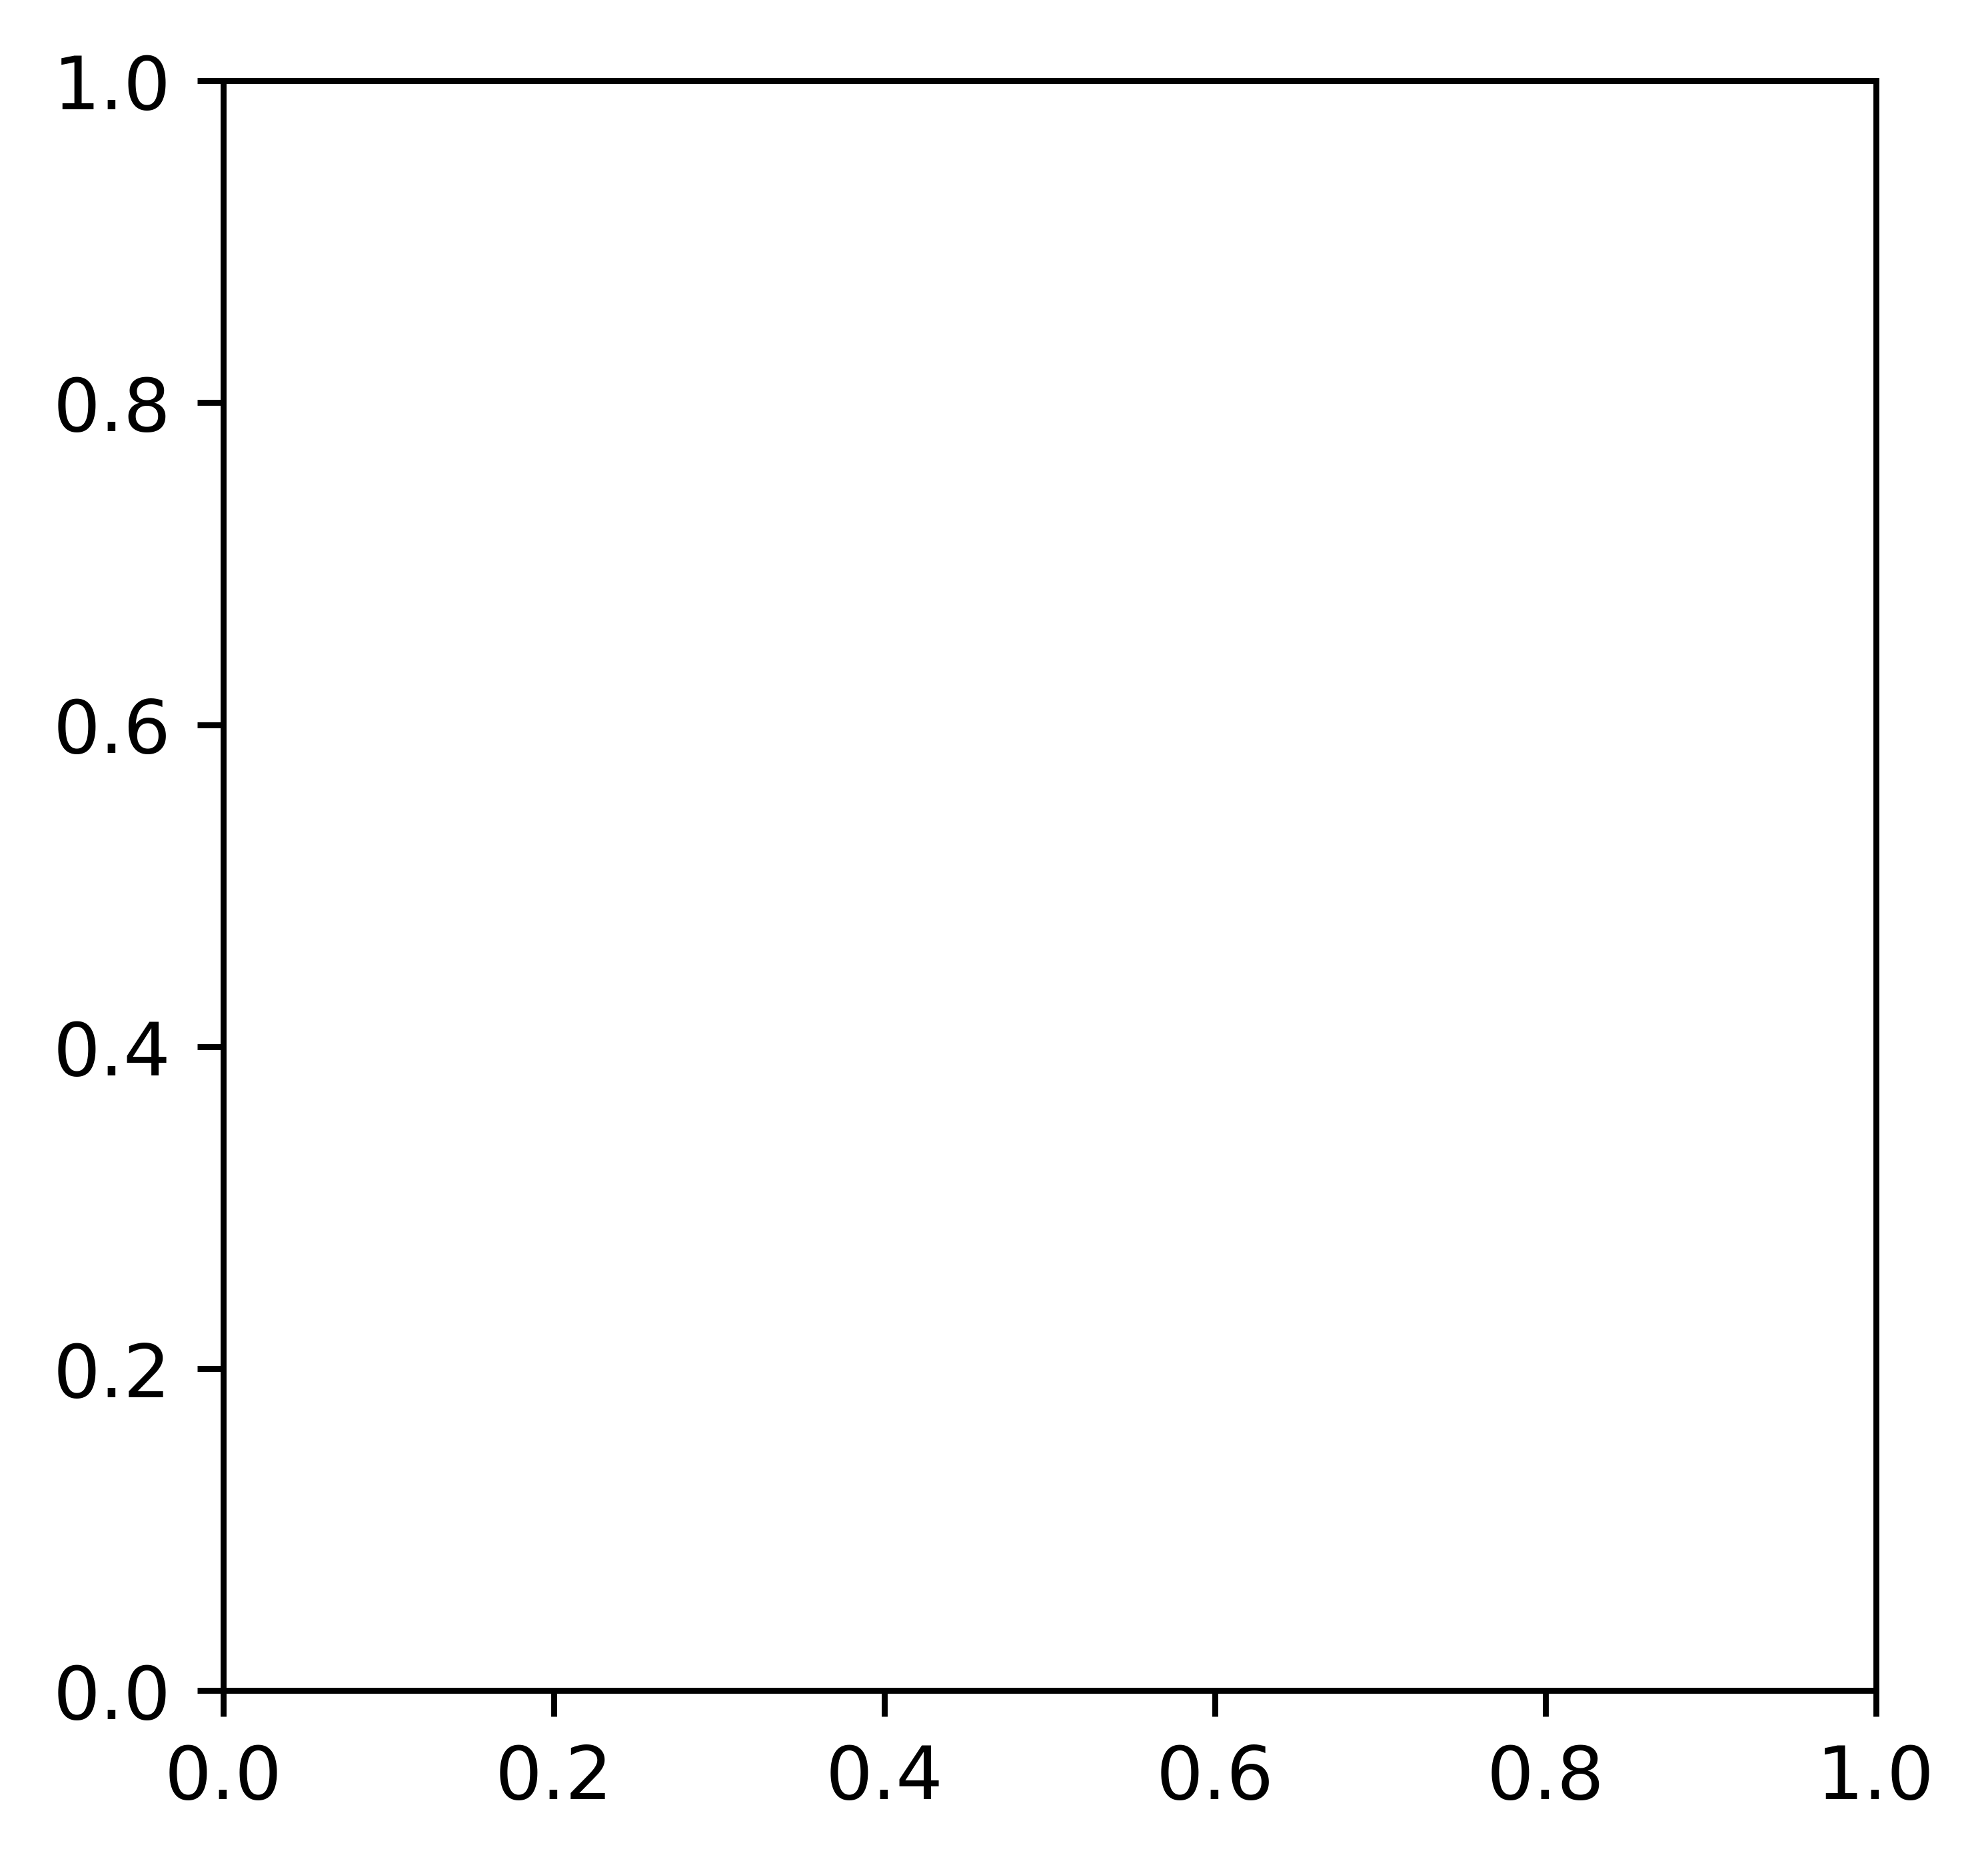

In [40]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

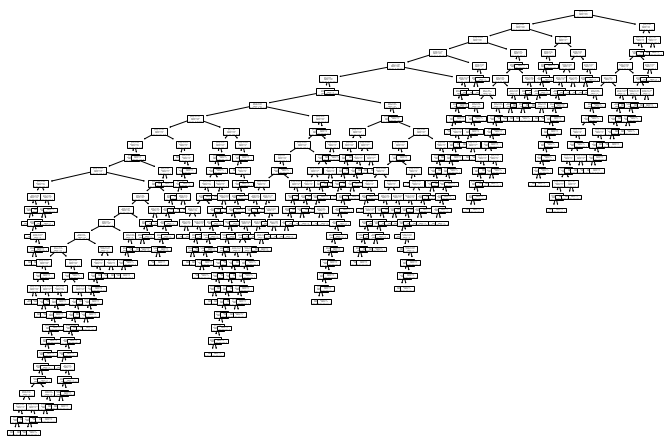

In [83]:
ax=plt.axes([.1,.1,1.5,1.5])
tree.plot_tree(best[0])

plt.savefig('images/FinalTree.pdf', dpi=1000)



In [ ]:
type(cm)

numpy.ndarray

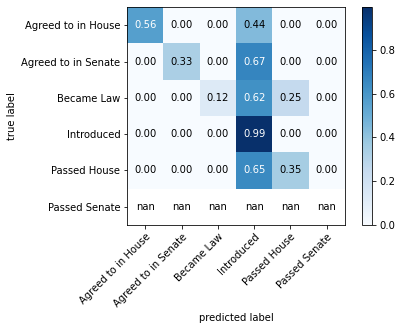

In [71]:

fig, ax = plot_confusion_matrix(conf_mat=cm,
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True,
                                class_names=class_names)
plt.show()


In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best.classes_ )

fig = plt.figure(figsize=(15,15))


ax = fig.add_subplot(111)



#ax.set_xticklabels(ax.get_xticks(), rotation = 45)

#disp.plot(cmap='Blues', ax=ax)




disp=from_estimator(y_test,predictions,labels=best.classes_, xticks_rotation='horizontal')

disp.plot(cmap='Blues', ax=ax)



multiclass = np.array([[2, 1, 0, 0],
                       [1, 2, 0, 0],
                       [0, 0, 1, 0],
                       [0, 0, 0, 1]])